In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import gensim

from gensim.models import Word2Vec, KeyedVectors

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt
import nltk

from tensorflow.keras.utils import to_categorical

In [8]:
data = pd.read_csv("data/news_class.csv")

df = data.copy() # to be safe and avoid errors

df = df.loc[:,["data_id" , "content" , "category_level_1" , "category_level_2"]]
df.groupby(['category_level_1'])['data_id'].agg('count')

category_level_1
arts, culture, entertainment and media        300
conflict, war and peace                       800
crime, law and justice                        500
disaster, accident and emergency incident     500
economy, business and finance                 400
education                                     607
environment                                   600
health                                        700
human interest                                600
labour                                        703
lifestyle and leisure                         300
politics                                      900
religion and belief                           800
science and technology                        800
society                                      1100
sport                                         907
weather                                       400
Name: data_id, dtype: int64

In [17]:
# Function for removing ASCII characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting to lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words

def remove_stop_words(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text =  tokenizer.tokenize(text)
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text


# Function for removing html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def lemm_text(text):
    lemm=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    tokens = text
    return ' '.join([lemm.lemmatize(t) for t in tokens])


def remove_digits(text):
    text = re.sub(r'\d', '', text)
    #text = " ".join(text)
    return text

In [18]:
df['Cleaned'] = df['content'].apply(_removeNonAscii)
df['Cleaned'] = df.Cleaned.apply(func = make_lower_case)
df['Cleaned'] = df.Cleaned.apply(func = remove_stop_words)
df['Cleaned'] = df.Cleaned.apply(func = remove_punctuation)
df['Cleaned'] = df.Cleaned.apply(func = remove_html)
df['Cleaned'] = df.Cleaned.apply(func = lemm_text)
df['Cleaned'] = df.Cleaned.apply(func = remove_digits)
df = df.drop('content' , axis =1)

In [28]:
io = df.copy()

io = io.drop([374]).reset_index(drop=True)
io = io.drop([6527]).reset_index(drop=True)

corpus_full = []
for words in io['Cleaned']:
    corpus_full.append(words.split()) 

In [59]:
corpus_full[0]

['virginia',
 'woman',
 'whose',
 'year',
 'old',
 'son',
 'found',
 'trash',
 'incinerator',
 'charged',
 'murder',
 'death',
 'hampton',
 'commonwealth',
 'attorney',
 'anton',
 'bell',
 'told',
 'news',
 'conference',
 'thursday',
 'warrant',
 'issued',
 'year',
 'old',
 'julia',
 'leanna',
 'tomlin',
 'also',
 'charged',
 'unlawfully',
 'disposing',
 'noah',
 'tomlin',
 'body',
 'bell',
 'said',
 'skull',
 'fracture',
 'found',
 'toddler',
 'body',
 'indicates',
 'level',
 'force',
 'severe',
 'child',
 'fallen',
 'several',
 'story',
 'building',
 'julia',
 'tomlin',
 'reported',
 'son',
 'missing',
 'june',
 'searcher',
 'sifted',
 'landfill',
 'steam',
 'plant',
 'day',
 'body',
 'found',
 'july',
 'tomlin',
 'already',
 'jailed',
 'charged',
 'three',
 'count',
 'felony',
 'child',
 'neglect',
 'prior',
 'reporting',
 'noah',
 'missing']

In [52]:
def vectorizer():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned'][:1]:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [53]:
model = Word2Vec(sentences=corpus_full[:1], vector_size=100, window=4, min_count=1, sg = 1 , hs = 1)  # skipgram architecture

In [54]:
#model.save("model_4_a_parenthesis.h3")

In [60]:
model.wv.most_similar('body' , topn = 10)

[('conference', 0.20017114281654358),
 ('story', 0.19558556377887726),
 ('commonwealth', 0.19557322561740875),
 ('also', 0.17227035760879517),
 ('issued', 0.17018073797225952),
 ('unlawfully', 0.14117678999900818),
 ('trash', 0.13635891675949097),
 ('woman', 0.12257944047451019),
 ('already', 0.12059006094932556),
 ('three', 0.09301666915416718)]

In [61]:
vect = vectorizer()

In [62]:
vect

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.000142,0.000512,0.000031,0.00078,-0.000178,-0.001472,0.000971,0.00227,-0.001225,-0.001599,...,0.001298,0.000074,0.000236,-0.000169,0.001984,0.000627,-0.00033,-0.000177,-0.000159,-0.000873


In [66]:
vect.shape

(1, 100)

In [68]:
len(samples)

79

In [63]:
samples = corpus_full[0]

In [71]:
sample_vectors = np.array([model.wv[word] for word in samples])

In [75]:
from sklearn.decomposition import PCA

In [93]:
 pca = PCA(n_components=3)

In [94]:
pca.fit(sample_vectors)

PCA(n_components=3)

In [95]:
sample_vectors.shape

(79, 100)

In [96]:
new_vect = pca.transform(sample_vectors)

In [97]:
new_vect.shape

(79, 3)

In [98]:
samples_1 = samples[:15]

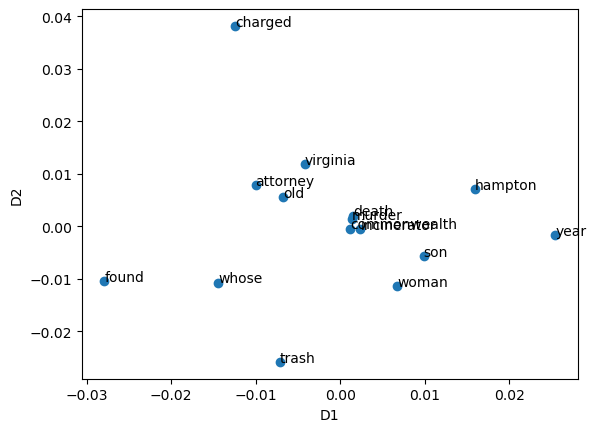

In [99]:
plt.figure()
plt.scatter(new_vect[:15,0], new_vect[:15,1])
for i, word in enumerate(samples_1):
    plt.annotate(samples_1[i], xy=(new_vect[i, 0], new_vect[i, 1]))

plt.xlabel("D1")
plt.ylabel("D2")
plt.show()

In [100]:
# NOW IN 3d

In [109]:
%matplotlib notebook

<IPython.core.display.Javascript object>


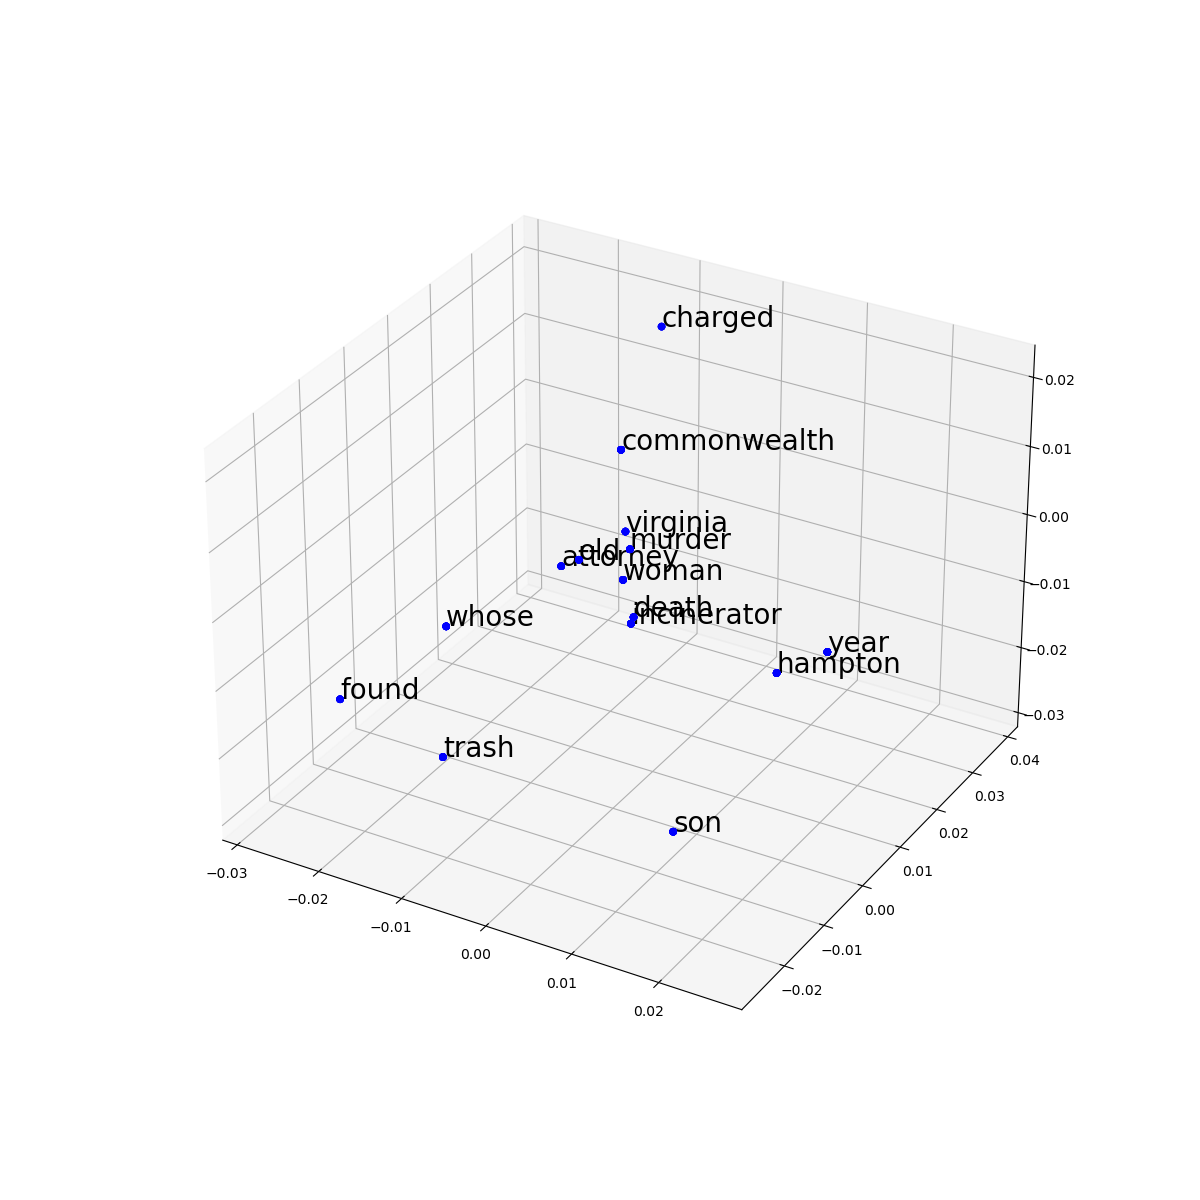

In [110]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

    
    
for i in range(len(samples_1)): #plot each point + it's index as text above
    ax.scatter(new_vect[:15,0],new_vect[:15,1],new_vect[:15,2], color='b') 

    ax.text(new_vect[i,0] ,new_vect[i,1] , new_vect[i,2] ,  '%s' % (samples_1[i]), size=20, zorder=1,  color='k') 
    

    

#ax.view_init(azim=90, elev=0)    
    
    
plt.show()

In [115]:
# FOR a 2nd OPTION

In [111]:
def vectorizer():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned'][1:2]:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [112]:
model = Word2Vec(sentences=corpus_full[1:2], vector_size=100, window=4, min_count=1, sg = 1 , hs = 1)  # skipgram architecture

In [113]:
vect = vectorizer()

In [114]:
samples = corpus_full[1]

<IPython.core.display.Javascript object>


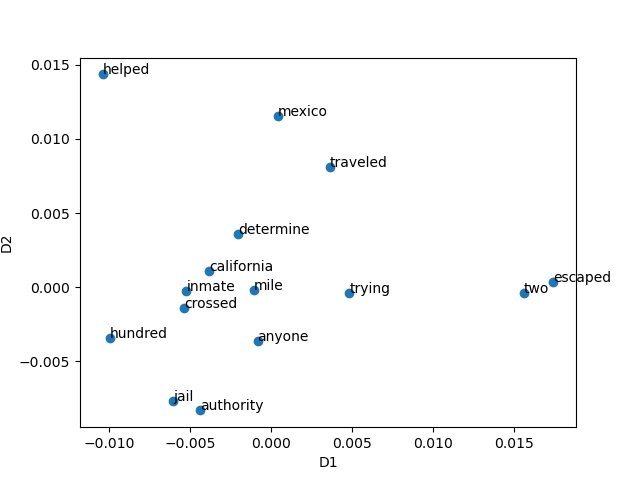

In [116]:
sample_vectors = np.array([model.wv[word] for word in samples])

pca = PCA(n_components=3)

pca.fit(sample_vectors)

new_vect = pca.transform(sample_vectors)

samples_1 = samples[:15]

plt.figure()
plt.scatter(new_vect[:15,0], new_vect[:15,1])
for i, word in enumerate(samples_1):
    plt.annotate(samples_1[i], xy=(new_vect[i, 0], new_vect[i, 1]))

plt.xlabel("D1")
plt.ylabel("D2")
plt.show()

<IPython.core.display.Javascript object>


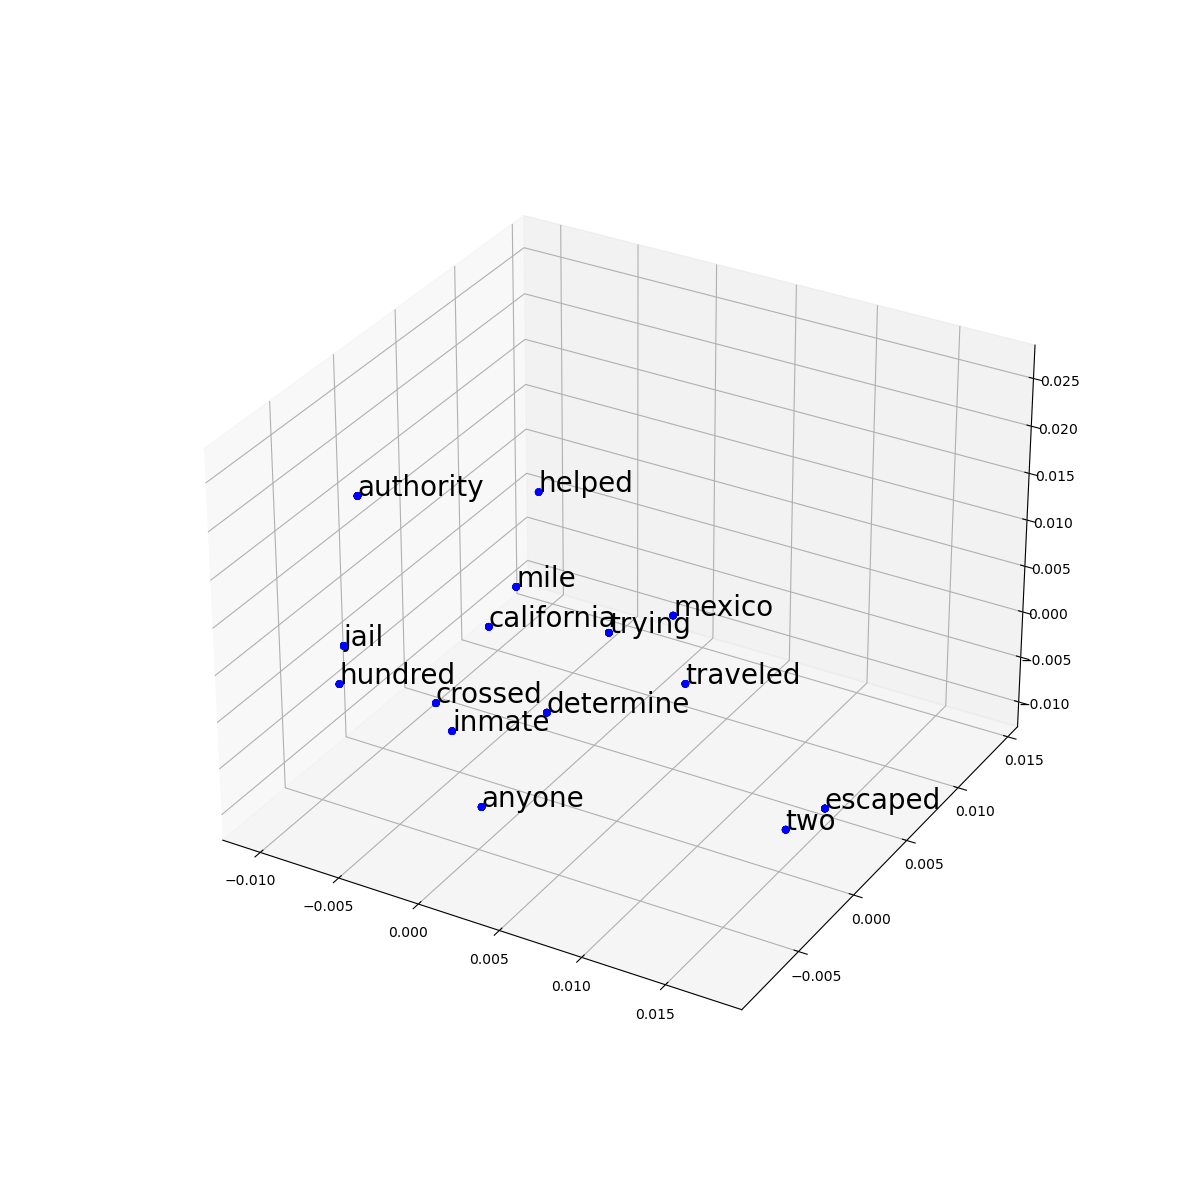

In [117]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

    
    
for i in range(len(samples_1)): #plot each point + it's index as text above
    ax.scatter(new_vect[:15,0],new_vect[:15,1],new_vect[:15,2], color='b') 

    ax.text(new_vect[i,0] ,new_vect[i,1] , new_vect[i,2] ,  '%s' % (samples_1[i]), size=20, zorder=1,  color='k') 
    

    

#ax.view_init(azim=90, elev=0)    
    
    
plt.show()